# Train sizing
---------------------------------

This example shows how to asses a model's performance based on the size of the training set.

The data used is a variation on the Australian weather dataset from https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. The goal of this dataset is to predict whether or not it will rain tomorrow training a binay classifier on target RainTomorrow.

## Load the data

In [1]:
# Import packages
import numpy as np
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Load the Australian weather dataset
X = pd.read_csv('./datasets/weatherAUS.csv')

# Let's have a look at a subset of the data
X.sample(frac=1).iloc[:5, :8]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
3118,BadgerysCreek,11.7,23.2,0.0,NaN,NaN,SW,28.0
18965,NorahHead,10.2,19.4,0.0,NaN,NaN,SSE,30.0
11196,CoffsHarbour,9.7,21.2,0.0,NaN,NaN,NW,26.0
62283,Sale,8.4,21.7,0.0,NaN,NaN,WSW,41.0
92461,Townsville,11.1,27.1,0.0,7.6,10.7,ENE,37.0


## Run the pipeline

In [3]:
# Initialize ATOM and prepare the data
atom = ATOMClassifier(X, verbose=2, random_state=1)
atom.impute(strat_num='median', strat_cat='most_frequent', min_frac_rows=0.8)
atom.encode()

<< ================== ATOM ================== >>
Algorithm task: binary classification.
Applying data cleaning...

Dataset stats ================= >>
Shape: (142193, 22)
Missing values: 292032
Categorical columns: 5
Scaled: False
----------------------------------
Size of training set: 113755
Size of test set: 28438
----------------------------------
Class balance: No:Yes <==> 3.5:1.0
Instances in RainTomorrow per class:
|        |    total |    train_set |    test_set |
|:-------|---------:|-------------:|------------:|
| 0: No  |   110316 |        88263 |       22053 |
| 1: Yes |    31877 |        25492 |        6385 |

Fitting Imputer...
Imputing missing values...
 --> Dropping 15182 rows for containing less than 80% non-missing values.
 --> Imputing 100 missing values with median in feature MinTemp.
 --> Imputing 57 missing values with median in feature MaxTemp.
 --> Imputing 640 missing values with median in feature Rainfall.
 --> Imputing 46535 missing values with median in featu

In [4]:
# We can analyze the impact of the training set's size on a LightGBM model
atom.train_sizing('lgb', train_sizes=np.linspace(0.1, 1, 9), bagging=4)


Running pipeline ============================= >>
Models in pipeline: LGB
Metric: f1


Run 0 (10% of set) ============================>>
Size of training set: 11375
Size of test set: 28438


Results for LightGBM:         
Fitting -----------------------------------------
Score on the train set --> f1: 0.8029
Score on the test set  --> f1: 0.6086
Time elapsed: 0.998s
Bagging -----------------------------------------
Score --> f1: 0.5945 ± 0.0073
Time elapsed: 2.229s
-------------------------------------------------
Total time: 3.242s


Final results ========================= >>
Duration: 3.244s
------------------------------------------
LightGBM --> f1: 0.594 ± 0.007 ~


Run 1 (21% of set) ============================>>
Size of training set: 24172
Size of test set: 28438


Results for LightGBM:         
Fitting -----------------------------------------
Score on the train set --> f1: 0.7292
Score on the test set  --> f1: 0.6273
Time elapsed: 1.244s
Bagging ------------------------------

## Analyze the results

In [5]:
# Note that the results dataframe now is multi-index
atom.results

,,name,score_train,score_test,time_fit,mean_bagging,std_bagging,time_bagging,time
run,model,,,,,,,,
0,LGB,LightGBM,0.802859,0.608590,0.998s,0.594472,0.007341,2.229s,3.242s
1,LGB,LightGBM,0.729212,0.627277,1.244s,0.616583,0.005321,2.879s,4.129s
2,LGB,LightGBM,0.695463,0.632544,1.533s,0.619899,0.003822,3.502s,5.039s
3,LGB,LightGBM,0.683228,0.638575,1.825s,0.625589,0.003608,4.148s,5.979s
4,LGB,LightGBM,0.681811,0.639062,2.152s,0.627105,0.002460,4.838s,6.996s
5,LGB,LightGBM,0.676747,0.639897,2.418s,0.634642,0.002138,5.622s,8.045s
6,LGB,LightGBM,0.666471,0.638376,2.810s,0.634245,0.002098,6.240s,9.058s
7,LGB,LightGBM,0.665065,0.643197,3.063s,0.637232,0.002537,6.888s,9.958s
8,LGB,LightGBM,0.665018,0.654904,3.379s,0.650772,0.002577,7.621s,11.009s


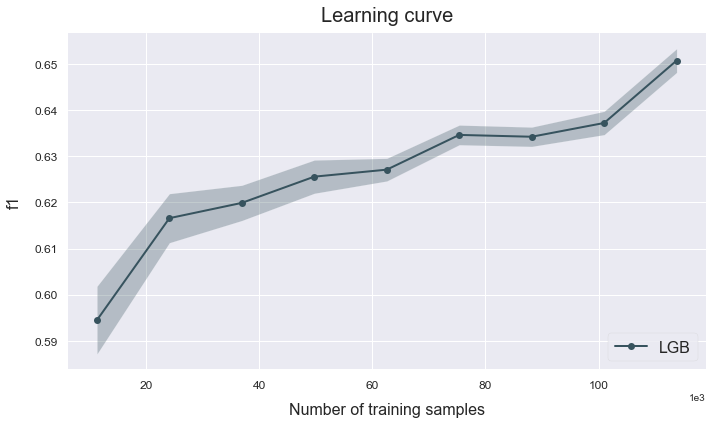

In [6]:
# Plot the train sizing's results
atom.plot_learning_curve()